# Using SciPy to Determine Distribution Types

In this tutorial, we'll:

1. Generate random datasets from various distributions.
2. Visualize the datasets using Seaborn to understand their shapes.
3. Use statistical tests from scipy.stats to determine if the data fits certain distributions.

Please see https://docs.scipy.org/doc/scipy/reference/stats.html for documentation on the SciPy stats module.

You may find this article on statistical distributions a helpful introduction: https://datasciencedojo.com/blog/types-of-statistical-distributions-in-ml/ 

In [1]:
# Import NumPy for numerical operations
import numpy as np

# Import statistical functions and distributions from SciPy
from scipy import stats

# Import Seaborn for data visualization
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_theme(style='whitegrid')

## Generate Random Datasets

We'll create datasets from the following distributions:
- Normal Distribution
- Exponential Distribution
- Poisson Distribution
- Uniform Distribution

In [2]:
# First we set the random seed for reproducibility. This will ensure that we get the
# same randomly generated datasets each time we run the code.
np.random.seed(42)

### Normal Distribution

In [3]:
# Generate 1000 random numbers from a normal distribution with mean=0 and std=1
data_normal = np.random.normal(loc=0, scale=1, size=1000)

<Axes: ylabel='Count'>

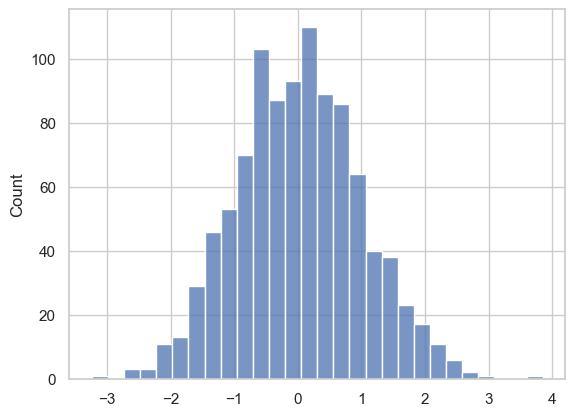

In [4]:
sns.histplot(data_normal)

### Exponential Distribution

In [5]:
# Generate 1000 random numbers from an exponential distribution with scale=1
data_exponential = np.random.exponential(scale=1, size=1000)

<Axes: ylabel='Count'>

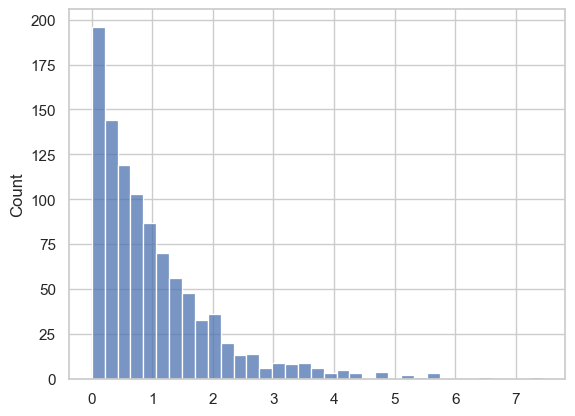

In [6]:
sns.histplot(data_exponential)

### Poisson Distribution

In [7]:
# Generate 1000 random numbers from a Poisson distribution with lambda=3
data_poisson = np.random.poisson(lam=3, size=1000)

<Axes: ylabel='Count'>

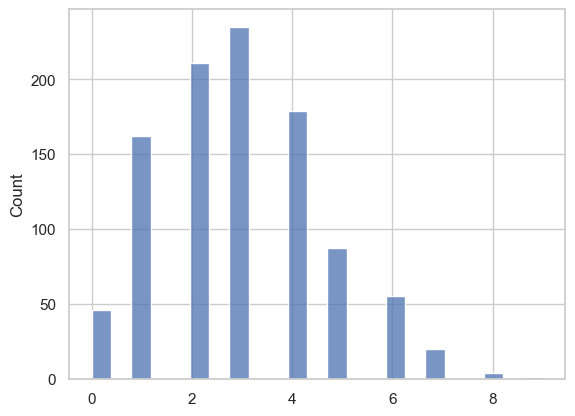

In [8]:
sns.histplot(data_poisson)

### Uniform Distribution

In [9]:
# Generate 1000 random numbers from a uniform distribution between -2 and 2
data_uniform = np.random.uniform(low=-2, high=2, size=1000)

<Axes: ylabel='Count'>

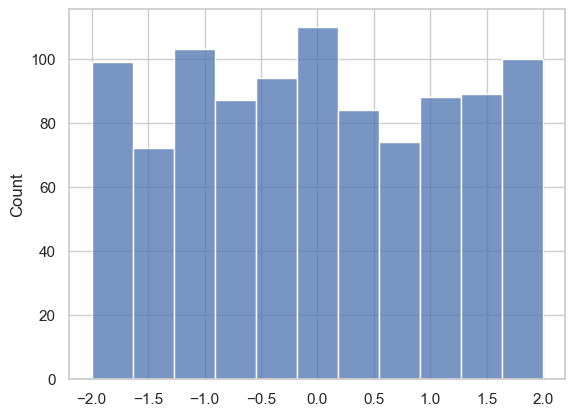

In [10]:
sns.histplot(data_uniform)

## Statistical Tests to Determine Distribution Type

We will use the following statistical tests:

- Normality Tests: To check if data follows a normal distribution.
    - Shapiro-Wilk Test
    - Kolmogorov-Smirnov Test
- Exponential Distribution Test:
    - Kolmogorov-Smirnov Test
- Poisson Distribution Test:
    - Chi-Squared Goodness of Fit Test
- Uniform Distribution Test:
    - Kolmogorov-Smirnov Test

### Checking for Normality

#### Shapiro-Wilk Test

In [11]:
def shapiro_wilk_test(data):
    """
    Performs the Shapiro-Wilk test for normality. This function is really just
    a wrapper for stats.shapiro().

    Parameters:
    - data: array-like, the dataset to test

    Returns:
    - W statistic and p-value
    """
    
    w_stat, p = stats.shapiro(data)
    return w_stat, p

In [12]:
# Test normality of data_normal
stat, p = shapiro_wilk_test(data_normal)

print('Shapiro-Wilk Test for Normal Distribution Data:')
print(f'W Statistic: {stat:.4f}, p-value: {p:.4f}')

if p > 0.05:
    print('Fail to reject the null hypothesis: Data is normally distributed.')
else:
    print('Reject the null hypothesis: Data is not normally distributed.')

Shapiro-Wilk Test for Normal Distribution Data:
W Statistic: 0.9986, p-value: 0.6273
Fail to reject the null hypothesis: Data is normally distributed.


##### Interpretation:

High p-value (> 0.05): Fail to reject the null hypothesis (data follows the distribution).<br>
Low p-value (≤ 0.05): Reject the null hypothesis (data does not follow the distribution).

#### Kolmogorov-Smirnov Test for Normality

In [13]:
def ks_test_normal(data):
    """
    Performs the Kolmogorov-Smirnov test for normality after standardizing the data.
    Standardizing transforms the data to have a mean of 0 and a standard deviation of 1
    This ensures that the data is on the same scale as the normal distribution, which
    the test uses as a reference. This makes the test more accurate when used with
    datasets created with different scales or units.

    Parameters:
    - data: array-like, the dataset to test

    Returns:
    - D statistic and p-value
    """
    standardized_data = (data - np.mean(data)) / np.std(data)
    d_stat, p = stats.kstest(standardized_data, 'norm')
    return d_stat, p

In [14]:
# Test normality of data_normal
stat, p = ks_test_normal(data_normal)

print('Kolmogorov-Smirnov Test for Normal Distribution Data:')
print(f'D Statistic: {stat:.4f}, p-value: {p:.4f}')

if p > 0.05:
    print('Fail to reject the null hypothesis: Data is normally distributed.')
else:
    print('Reject the null hypothesis: Data is not normally distributed.')

Kolmogorov-Smirnov Test for Normal Distribution Data:
D Statistic: 0.0215, p-value: 0.7370
Fail to reject the null hypothesis: Data is normally distributed.


### Testing for Exponential Distribution

In [15]:
def ks_test_exponential(data):
    """
    Performs the Kolmogorov-Smirnov test for exponential distribution.

    Parameters:
    - data: array-like, the dataset to test

    Returns:
    - D statistic and p-value
    """
    # Shift data to ensure all values are >= 0. The exponential distribution is defined
    # for values >= 0. If the data contains negative values, the test could produce inaccurate
    # results or fail.
    shifted_data = data - np.min(data)
    
    # Calculate loc and scale, allowing the test to tailor the exponential distribution to the
    # data. This makes the comparison more meaningful and accurate.
    loc, scale = stats.expon.fit(shifted_data)

    d_stat, p = stats.kstest(shifted_data, 'expon', args=(loc, scale))
    return d_stat, p

In [16]:
# Test if data_exponential follows an exponential distribution
stat, p = ks_test_exponential(data_exponential)

print('Kolmogorov-Smirnov Test for Exponential Distribution Data:')
print(f'D Statistic: {stat:.4f}, p-value: {p:.4f}')

if p > 0.05:
    print('Fail to reject the null hypothesis: Data follows an exponential distribution.')
else:
    print('Reject the null hypothesis: Data does not follow an exponential distribution.')

Kolmogorov-Smirnov Test for Exponential Distribution Data:
D Statistic: 0.0203, p-value: 0.7965
Fail to reject the null hypothesis: Data follows an exponential distribution.


### Testing for Poisson Distribution

In [17]:
def chi_square_test_poisson(data):
    """
    Performs the Chi-Squared test for Poisson distribution.

    Parameters:
    - data: array-like, the dataset to test

    Returns:
    - Chi-squared statistic and p-value
    """
    # Get the maximum observed value to define bins. Bins should extend up to the
    # maximum value to ensure that the entire range of the data is represented,
    # which is essential for accurate frequency calculation.
    max_value = np.max(data)

    # Create bins for each integer value up to max_value. This step defines the bins
    # for the histogram to count observed frequencies. The - 0.5 shift centers the bins
    # around integer values, ensuring that each integer is correctly counted in its
    # respective bin. This alignment helps in accurately calculating the observed
    # frequencies for a Poisson distribution.
    bins = np.arange(0, max_value + 2) - 0.5

    # Calculate observed frequencies using histogram. The histogram function is used to
    # calculate the number of data points that fall into each bin, effectively computing
    # the observed frequency distribution of the data. This step is necessary for comparing
    # observed counts with expected counts in the chi-squared test.
    observed_freq, _ = np.histogram(data, bins=bins)

    # Estimate the lambda parameter (mean of the data). The mean of the data serves as an
    # estimate for the parameter lambda (λ) in a Poisson distribution. The Poisson
    # distribution is defined by its mean, so estimating lambda from the data allows for
    # the generation of an expected distribution that matches the observed data's average
    # rate of occurrence.
    lambda_estimate = np.mean(data)

    # Calculate expected frequencies using the Poisson PMF. This step computes the expected
    # frequency for each integer value using the Poisson probability mass function (PMF).
    # By multiplying the PMF values by the total number of data points, the function scales
    # the probabilities to match the size of the dataset, resulting in expected frequencies
    # for comparison against the observed data.
    expected_counts = stats.poisson.pmf(
        np.arange(0, max_value + 1), lambda_estimate) * len(data)

    # Adjust expected frequencies to ensure the sums match. This adjustment ensures that the
    # total sum of the expected frequencies matches the total number of observed data points.
    # Due to potential rounding errors or differences in distribution tails, this
    # normalization helps align the expected and observed total counts, improving the accuracy
    # of the chi-squared test.
    expected_freq = expected_counts * \
        (observed_freq.sum() / expected_counts.sum())

    # Perform the Chi-Squared test. The chi-squared test is performed by comparing the
    # observed and expected frequency distributions. The test returns a chi-squared statistic,
    # which quantifies the difference between the distributions, and a p-value, which
    # indicates the significance of that difference. This final step allows for hypothesis
    # testing to determine if the observed data follows a Poisson distribution.
    chi_squared_stat, p = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)
    return chi_squared_stat, p

In [18]:
# Test if data_poisson follows a Poisson distribution
stat, p = chi_square_test_poisson(data_poisson)

print('Chi-Squared Test for Poisson Distribution Data:')
print(f'Chi-Squared Statistic: {stat:.4f}, p-value: {p:.4f}')

if p > 0.05:
    print('Fail to reject the null hypothesis: Data follows a Poisson distribution.')
else:
    print('Reject the null hypothesis: Data does not follow a Poisson distribution.')

Chi-Squared Test for Poisson Distribution Data:
Chi-Squared Statistic: 8.6727, p-value: 0.4680
Fail to reject the null hypothesis: Data follows a Poisson distribution.


### Testing for Uniform Distribution

In [19]:
def ks_test_uniform(data):
    """
    Performs the Kolmogorov-Smirnov test for uniform distribution.

    Parameters:
    - data: array-like, the dataset to test

    Returns:
    - D statistic and p-value
    """
    # This step standardizes the data so that it fits within the range [0, 1].
    # The transformation rescales the minimum value of data to 0 and the maximum
    # value to 1, with all intermediate values proportionally adjusted within
    # this range.
    # The Kolmogorov-Smirnov (KS) test checks the similarity between the empirical
    # distribution of the data and a specified distribution (in this case, a
    # uniform distribution). A uniform distribution over the interval [0, 1]
    # assumes that all data points are equally likely across this range. By
    # scaling the data to [0, 1], the comparison becomes valid and meaningful.
    scaled_data = (data - np.min(data)) / (np.max(data) - np.min(data))

    stat, p = stats.kstest(scaled_data, 'uniform')
    return stat, p

In [20]:
# Test if data_uniform follows a uniform distribution
stat, p = ks_test_uniform(data_uniform)

print('Kolmogorov-Smirnov Test for Uniform Distribution Data:')
print(f'D Statistic: {stat:.4f}, p-value: {p:.4f}')

if p > 0.05:
    print('Fail to reject the null hypothesis: Data follows a uniform distribution.')
else:
    print('Reject the null hypothesis: Data does not follow a uniform distribution.')

Kolmogorov-Smirnov Test for Uniform Distribution Data:
D Statistic: 0.0263, p-value: 0.4838
Fail to reject the null hypothesis: Data follows a uniform distribution.


## What about stat?
You may have noticed that each of our test functions returns both a stat and a p-value. We only used the p-value in the examples above. The stat value supplies additional context. Below we show an example that uses the W statistic returned by the Shapiro-Wilk test for normality as well as the p-value. To show how this varies, we will use normally distributed data that has been skewed.

In [21]:
# Function to generate skewed data
def generate_skewed_data(size, skewness):
    """
    Generates data with a specified skewness.

    Parameters:
    - size: int, number of data points
    - skewness: float, skewness parameter

    Returns:
    - data: array-like, generated dataset
    """
    # Generate data from a normal distribution
    data = np.random.normal(loc=0, scale=1, size=size)
    
    # Apply exponential transformation to introduce skewness
    data_skewed = np.sign(data) * np.abs(data) ** (1 + skewness)
    return data_skewed

Let's visualise the effects of skew as defined in the function above. We'll see that, although they are all based on a normal distribution, they diverge further and further as we increase skewness.  

In [22]:
data_normal = generate_skewed_data(1000, skewness=0.0)
data_moderate_skew = generate_skewed_data(1000, skewness=0.5)
data_high_skew = generate_skewed_data(1000, skewness=1.0)

<Axes: ylabel='Count'>

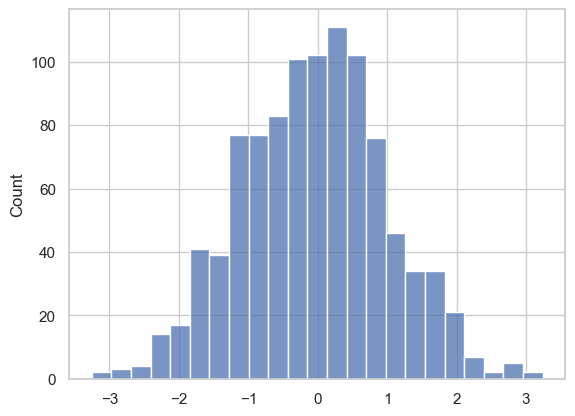

In [23]:
# Normally distributed data with skewness=0.0.
sns.histplot(data_normal)

<Axes: ylabel='Count'>

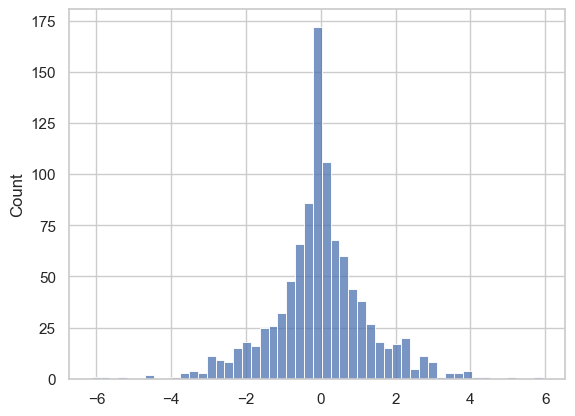

In [24]:
# Normally distributed data with skewness=0.5.
sns.histplot(data_moderate_skew)

<Axes: ylabel='Count'>

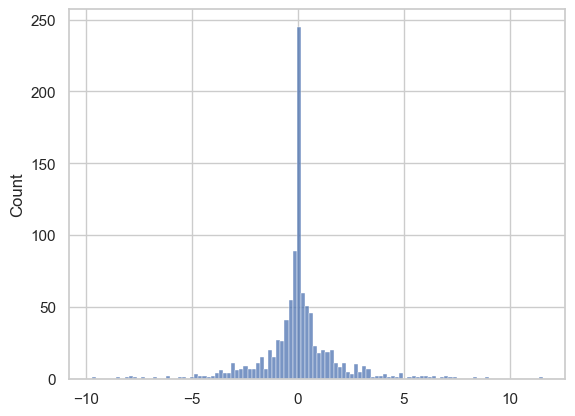

In [25]:
# Normally distributed data with skewness=1.0.
sns.histplot(data_high_skew)

In [26]:
# Test normality of the unskewed data
stat, p = shapiro_wilk_test(data_normal)

stat, p

(0.998820161474999, 0.767897403236018)

Interpretation of W Statistic: > 0.95: data closely resembles a normal distribution.<br>
Interpretation of p-value: > 0.05: fail to reject the null hypothesis (data follows the normal distribution).

In [27]:
# Test normality of the moderately skewed data
stat, p = shapiro_wilk_test(data_moderate_skew)

print(f'{stat:.2f}, {p:.20f}')
stat, p

0.96, 0.00000000000000071183


(0.9601665499898253, 7.118311417809235e-16)

Interpretation of W Statistic: 0.90 to 0.95: data somewhat resembles a normal distribution.<br>
Interpretation of p-value: < 0.05: reject the null hypothesis (data is not normally distributed).

In [28]:
# Test normality of the highly skewed data
stat, p = shapiro_wilk_test(data_high_skew)

print(f'{stat:.2f}, {p:.35f}')
stat, p

0.85, 0.00000000000000000000000000002008151


(0.8539218254506299, 2.008150908457505e-29)

Interpretation of W Statistic: < 0.90: data does not resemble a normal distribution.<br>
Interpretation of p-value: < 0.05: reject the null hypothesis (data is not normally distributed).

**Note**: the 0.95 and 0.9 thresholds used here are general rules of thumb, and are specific to the W stat returned by the Shapiro-Wilk test. The stat values returned by the other tests have different and potentially more complex interpretations. Statistical significance is more rigorously judged using the p-value.